# Previsão de readmissão de pacientes diabéticos

O objetivo desse projeto é criar um modelo que prêve se uma paciente diabético terá uma readmissão hospitalar.

## Bibliotecas

In [1]:
# Importando bibliotecas

import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

## Importando base de dados

In [2]:
# Abrindo arquivos dos pacientes

df = pd.read_csv("database/diabetic_data.csv")

In [4]:
# Observando primeiras amostras

df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Descrição dos dados

Abaixo temos uma imagem com a descrição de cada coluna na base de dados importada.

![imagem](database/DataDictonary.png)

A descrição para os valores númericos de <code>admission_type_id</code>, <code>discharge_disposition_id</code> e <code>admission_source_id</code> estão presentes no arquivo IDs_mapping.csv.

In [5]:
# Abrindo arquivo IDs_mapping.csv

IDs_mapping = pd.read_csv("database/IDs_mapping.csv")

In [9]:
# Observando as 15 primeiras amostras

IDs_mapping.head(15)

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped
8,NaN,NaN
9,discharge_disposition_id,description


df[

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

## Análise Exploratória

Vamos agora tentar entender melhor os dados para buscar novas ideias e desenvolvermos um modelo final de qualidade.

### Readmissão

Queremos desenvolver uma modelo que seja capaz de identificar se um paciente terá uma readmissão em menos de 30 dias, mais de 30 dias ou não terá uma readmissão. Sendo assim, a primeira informação que estudaremos é exatamente a nossa variável alvo, <code>readmitted</code>.

#### Distribuição de <code>readmitted</code>

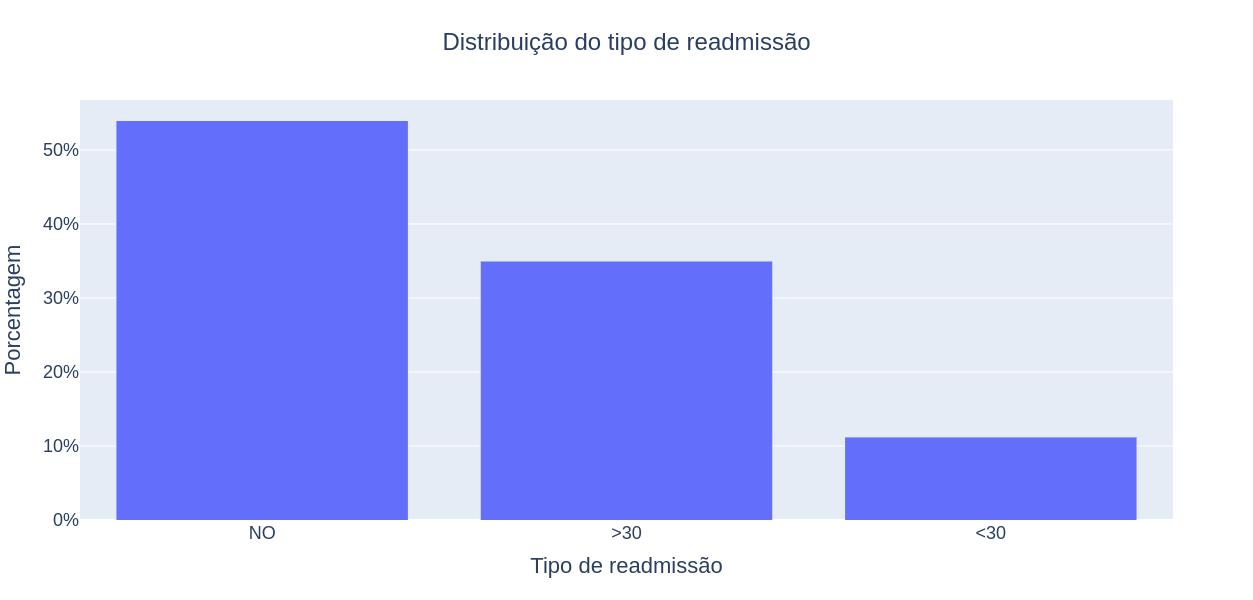

In [36]:
# Distribuição da readmissão dos pacientes

# objeto figure
fig = go.Figure()

# Add trace
fig.add_trace(go.Histogram(x = df["readmitted"], histnorm = "percent"))

# Update Layout
fig.update_layout(

    title = dict(
        text = "Distribuição do tipo de readmissão",
        font_size = 24,
        x = 0.5    
    ),
    
    xaxis = dict(
        title_text = "Tipo de readmissão",
        title_font_size = 22,
        tickfont_size = 18
        
    ),
    
    yaxis = dict(
        title_text = "Porcentagem",
        title_font_size = 22,
        tickfont_size = 18,
        ticksuffix = "%"
        
    ),
    
    width  = 800,
    height = 600
    

)

# show
fig.show()

Pelo gráfico acima vemos que entorno de 50% dos pacientes não são internados novamente enquanto que mais de 30% são internador novamente após 30 dias e aproximadamente 10% precisam ser internados com menos de 30 dias.

Percebemos que os dados não são tão desbalanciados com relação a variável alvo <code>readmitted</code>. 

### Genero

Próximo atributo a ser analisado será o genero dos pacientes.

In [37]:
# Valores unicos

df["gender"].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

Há 3 tipos de valores para o genero presente dos dados: Female, Male e Unknown/Invalid.

In [38]:
# Proporção para cada valor
df["gender"].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

Apenas 3 amostras não possui informação sobre o genero.

In [51]:
# Proporção (%) do número de casos por tipo de readmisão e sexo

df[["encounter_id","gender", "readmitted"]].groupby(["readmitted", "gender"]).count()/ len(df) * 100

encounter_id
readmitted gender                       
<30        Female               6.045241
           Male                 5.114675
>30        Female              19.179294
           Male                15.748875
NO         Female              28.534088
           Male                25.374880
           Unknown/Invalid      0.002948

Não encontramos nenhum padrão com relação ao sexo do paciente e a readmissão. A proporção de pacientes masculinos e femeninos são bem proximas para cada tipo de readmissão.

Percebemos também que as 3 amostras que não possuem sexo informado é de pacientes que não possuem readmissão. E como essas 3 amostras representam uma infima 